In [1]:
import numpy as np
from matplotlib import pyplot as plt

# 计算梯度：解析法
def grad1(x,y,z):
    dx = z
    dy = z
    dz = (x+y)
    return (dx,dy,dz)

def model(X, W, b):
    '''模型

    Args:
        X: 模型输入向量
        W: 模型连接权重向量
        b: 模型的偏置值

    Return:
        返回模型输出结果
    '''
    X = np.array(X)
    
    return np.sum(X * W) + b


In [2]:
import itertools
#itertools包自带无限迭代的迭代器
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

#小批量（mini batch）算法是指使用小批量训练集的优化算法。（把梯度求平均）
num_train = 1000
num_test = 100

# 制作数据集
data = make_regression(n_samples=num_train, n_features=2)
train_x, test_x, train_y, test_y = [itertools.cycle(i) for i in train_test_split(data[0], data[1], test_size=num_test)]


In [5]:
from sklearn.metrics import mean_squared_error as mse


train_steps = 2000  # 训练次数
lr =0.1            # 学习率
summary_step = 20   # 摘要频率 
summary = []        # 摘要


W = np.random.randn(2)  # 初始化连接权重
b = 0                             # 初始化偏置值
#n = 20                  #迭代次数
#sumW = sumb = 0
#m = 0
sumdW = sumdb = 0
 
for i in range(train_steps):
# 摘要
    #for m in range(n):  
    if i % summary_step == 0:
        tmp = []
        for j in range(num_test):
            X = next(test_x)
            label = next(test_y)
            out = model(X, W, b)
            tmp.append(np.array([label, out]))
            
        tmp = np.array(tmp)
        # 计算均方误差代价
        loss = mse(tmp[:, 0], tmp[:, 1])
        summary.append(np.array([i + 1, loss]))

    X = next(train_x)
    label = next(train_y)
    out = model(X, W, b)
    dW = -X * (label - out)
    db = -1 * (label - out)
    
    sumdW += dW
    sumdb += db
    
    if i % 32 == 31:
        W = W - lr * sumdW / 32
        b = b - lr * sumdb / 32
        
        sumdW = 0
        sumdb = 0

Text(0,0.5,'losses')

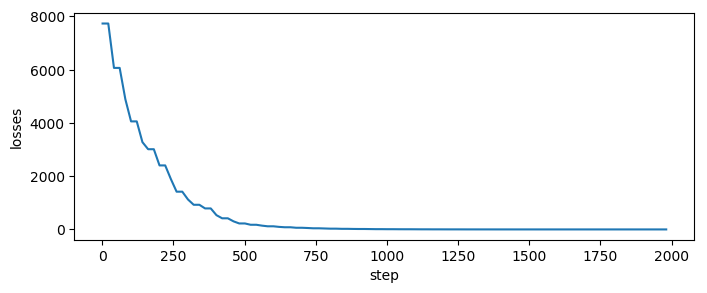

In [6]:
# 可视化摘要
summary = np.array(summary)    
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(summary[:, 0], summary[:, 1])
plt.xlabel('step')
plt.ylabel('losses')

In [7]:
print("如图所示，小批量数据训练的收敛速度会相对平稳的下降")

如图所示，小批量数据训练的收敛速度会相对平稳的下降
